**Importar as bibliotecas necessárias**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

**Carregar o dataset**

In [16]:
df = pd.read_csv('dataset.csv')

**Verificar valores NaN**

In [17]:
print("Valores NaN antes de tratamento:\n", df.isnull().sum())

Valores NaN antes de tratamento:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                 

**Separar características (X) e rótulo (y)**

In [18]:
X = df.drop('Target', axis=1)
y = df['Target']

**Normalização dos dados**

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Balanceamento das classes usando SMOTE**

In [20]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

**Dividir o dataset em conjunto de treinamento e teste**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Ajuste de hiperparâmetros do modelo de árvore de decisão**

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


**Fazer predições**

In [23]:
y_pred = clf.predict(X_test)

**Calcular a acurácia**

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Acurácia do modelo: 68.52%


**Imprimir relatório de classificação**

In [25]:
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

Relatório de classificação:
               precision    recall  f1-score   support

     Dropout       0.72      0.70      0.71       441
    Enrolled       0.38      0.38      0.38       245
    Graduate       0.78      0.79      0.78       642

    accuracy                           0.69      1328
   macro avg       0.63      0.62      0.63      1328
weighted avg       0.69      0.69      0.69      1328



**Matriz de confusão**

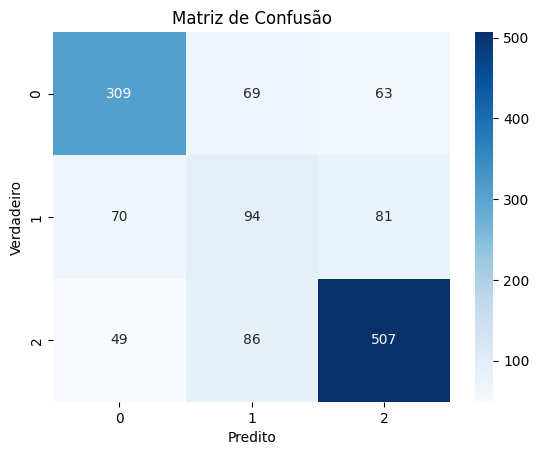

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

**Importância das características**

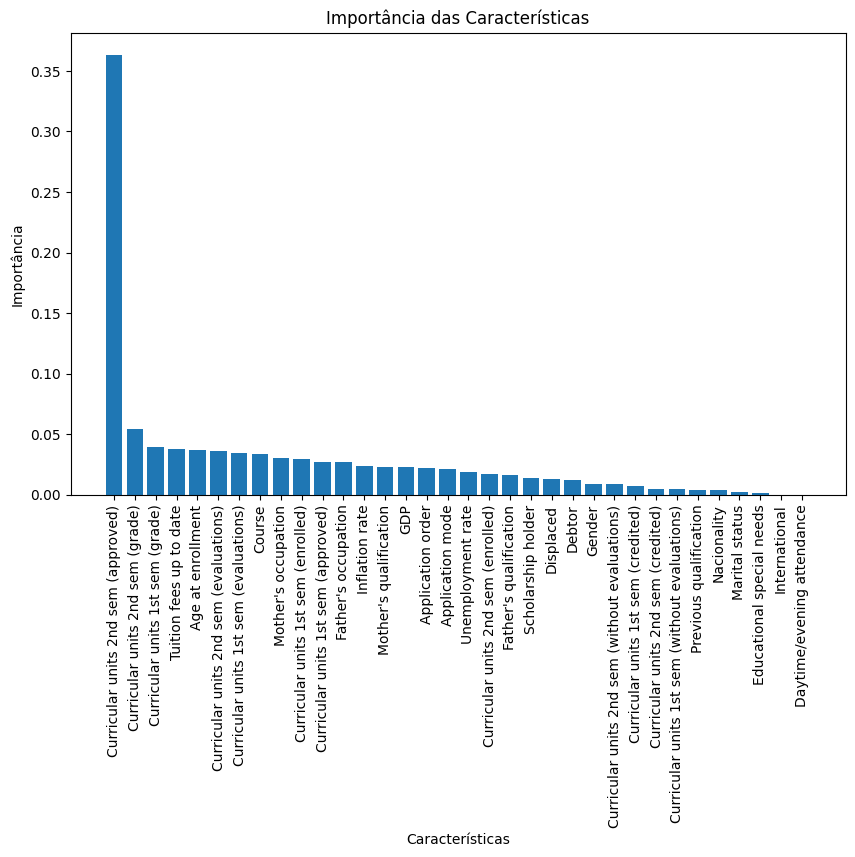

In [27]:
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.show()